In [1]:
from datetime import datetime, timedelta
from tqdm.notebook import tqdm

import pandas as pd
import numpy as np
import statistics
import seaborn as sns

from matplotlib import font_manager, rc 
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm

#마이너스 표시
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

In [365]:
movie_df = pd.read_csv("(완)[KOBIS] 박스오피스_일별(2003~2022)_수정.csv")
movie_df.head(1)

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
0,1,동갑내기 과외하기,2003-02-07,12세관람가,코미디,한국,한국,코리아 엔터테인먼트,CJ ENM,김경형,"김하늘,권상우,공유,김지우,백일섭,김혜옥,김자옥,오승근,이성진,손영민,송병철,신지현...",2003-01-12,633500,633500,102,102,1,1


In [17]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494385 entries, 0 to 494384
Data columns (total 18 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   순위      494385 non-null  int64         
 1   영화명     494385 non-null  object        
 2   개봉일     494385 non-null  datetime64[ns]
 3   등급      487038 non-null  object        
 4   장르      493814 non-null  object        
 5   대표국적    494256 non-null  object        
 6   국적      494256 non-null  object        
 7   제작사     215994 non-null  object        
 8   배급사     475936 non-null  object        
 9   감독      478759 non-null  object        
 10  배우      451803 non-null  object        
 11  기준일     494385 non-null  datetime64[ns]
 12  매출액     494385 non-null  int64         
 13  누적매출액   494385 non-null  int64         
 14  관객수     494385 non-null  int64         
 15  누적관객수   494385 non-null  int64         
 16  스크린수    494385 non-null  int64         
 17  상영횟수    494385 non-null  int6

In [16]:
# 날짜 형식으로 바꾸기
movie_df["개봉일"] = pd.to_datetime(movie_df["개봉일"], format="%Y-%m-%d")
movie_df["기준일"] = pd.to_datetime(movie_df["기준일"], format="%Y-%m-%d")

In [20]:
movie_df.shape

(494385, 18)

In [175]:
con_df = movie_df[["영화명", '개봉일','기준일','대표국적', '등급','매출액','누적매출액','관객수','누적관객수','스크린수','상영횟수']]
con_df = con_df[con_df['개봉일']<=con_df['기준일']].copy()

In [177]:
imsi = con_df.groupby(['영화명','개봉일','기준일'])['관객수'].sum().to_frame().reset_index().set_index(["영화명","개봉일"])
movie_index = con_df.groupby(['영화명','개봉일'])['관객수'].sum().to_frame()
movie_list = movie_index.index.to_list()

In [178]:
imsi

기준일     관객수
영화명        개봉일                          
#살아있다      2020-06-24 2020-06-24  204066
           2020-06-24 2020-06-25  148991
           2020-06-24 2020-06-26  152550
           2020-06-24 2020-06-27  294255
           2020-06-24 2020-06-28  256133
...                          ...     ...
힛쳐         2007-08-01 2007-08-10       8
           2007-08-01 2007-08-11       4
           2007-08-01 2007-08-12       9
           2007-08-01 2007-08-13       1
ＡＶ여배우의 자취방 2017-05-01 2017-05-01       1

[463182 rows x 2 columns]

In [203]:
check = []

for movie in movie_list:
    cnt = 1
    df = imsi.loc[movie]["기준일"].to_frame()
    df["기준일+1"]=df.shift(-1)
    for j in range(len(df)):
        if df["기준일"][j]+timedelta(1) == df["기준일+1"][j]:
            cnt += 1
        else:
            break
    check.append([movie, cnt])

In [205]:
pd.DataFrame(check).set_index(0).sort_values(1)

,1
0,
"(스와핑 : 잘못된 쾌락, 2020-01-17 00:00:00)",1
"(아줌맛, 2020-01-21 00:00:00)",1
"(아즈마 린의 전기고문실, 2016-06-17 00:00:00)",1
"(아찔한 가정부들의 유혹, 2021-02-06 00:00:00)",1
"(아찔한 욕정녀들, 2016-07-06 00:00:00)",1
...,...
"(그래비티, 2013-10-17 00:00:00)",191
"(소명, 2009-04-02 00:00:00)",210
"(극장판 귀멸의 칼날: 무한열차편, 2021-01-27 00:00:00)",217


In [208]:
292714/21808

13.422322083639031

In [218]:
statistics.median(pd.DataFrame(check).set_index(0).sort_values(1)[1].to_list())

1.0

# 개봉일 기준 42일까지 누적관객수

In [222]:
movie_42 = movie_df[movie_df["개봉일"]+timedelta(42)>movie_df["기준일"]]

In [236]:
movie_42_df = movie_42.groupby(['영화명','개봉일'])['누적관객수'].max().to_frame().sort_values("누적관객수",ascending=False)
movie_42_df

,,누적관객수
영화명,개봉일,
명량,2014-07-30,17349459
극한직업,2019-01-23,16082355
신과함께-죄와 벌,2017-12-20,14016927
어벤져스: 엔드게임,2019-04-24,13854068
겨울왕국 2,2019-11-21,13452593
...,...,...
마이홈,2008-07-22,0
호프만 이야기,2017-07-19,0
맥베스,2018-10-03,0


<Axes: >

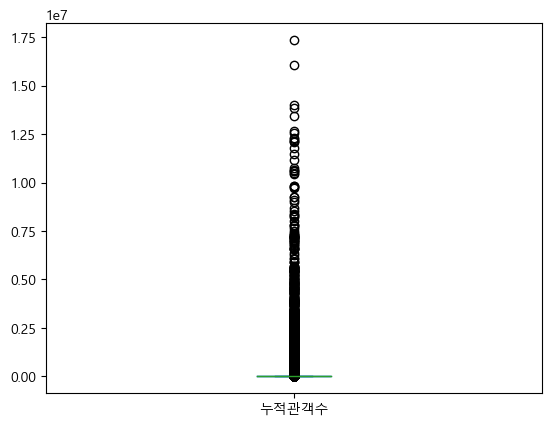

In [237]:
movie_42_df.plot(kind="box")

In [304]:
Q1 = movie_42_df.quantile(q=0.25)
Q3 = movie_42_df.quantile(q=0.75)
IQR = Q3-Q1
IQR

누적관객수    6794.5
dtype: float64

In [305]:
Q1-1.5*IQR

누적관객수   -10190.75
dtype: float64

In [263]:
IQR_movie_42 = movie_42_df[(movie_42_df <= Q3+1.5*IQR)&
                          (movie_42_df>= Q1-1.5*IQR)]
IQR_movie_42 = movie_42_df[movie_42_df>= Q1-1.5*IQR]

<Axes: >

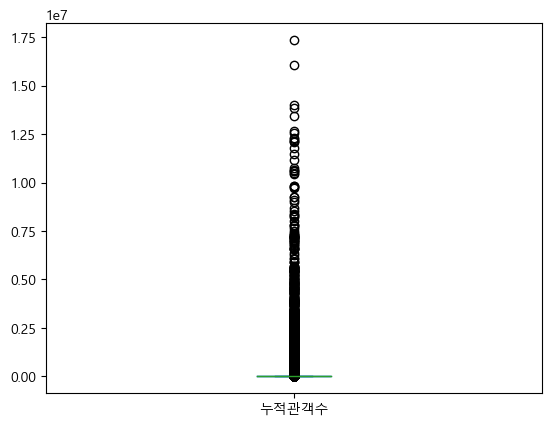

In [264]:
IQR_movie_42.plot(kind="box")

In [275]:
movie_42_df.groupby(['누적관객수'])['누적관객수'].count()

누적관객수
0             49
1           6074
2            233
3             59
4             61
            ... 
13452593       1
13854068       1
14016927       1
16082355       1
17349459       1
Name: 누적관객수, Length: 7889, dtype: int64

In [276]:
movie_42_df.groupby(['누적관객수'])['누적관객수'].count().sum()

20351

In [278]:
movie_42_df.median()

누적관객수    138.0
dtype: float64

In [318]:
imsi = movie_42.groupby(['영화명','개봉일'])['누적관객수','누적매출액'].max().sort_values("누적관객수",ascending=False)
imsi = imsi[imsi["누적관객수"]<100].head(20)
imsi

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_9004\3901034202.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  imsi = movie_42.groupby(['영화명','개봉일'])['누적관객수','누적매출액'].max().sort_values("누적관객수",ascending=False)


,,누적관객수,누적매출액
영화명,개봉일,,
집으로 간다,2015-05-21,99,603000
소림사: 무림퇴마전,2019-12-09,99,516000
패밀리섹션3 (2008 애니충격전),2008-11-17,99,479000
시니어퀸 : 58년 개띠 여고동창생,2021-05-11,99,693000
마음,2007-05-10,99,518000
카마수트라 나잇,2013-01-10,98,626000
보통날,2021-07-01,98,334000
물이 없는 풀장,2008-04-22,98,542000
나탈리 그랑제,2008-10-19,98,507000


In [319]:
7889/100*25

1972.25

In [320]:
movie_42_df.groupby(['누적관객수'])['누적관객수'].count().iloc[1972]

1

In [357]:
imsi = movie_df[(movie_df["장르"].str.contains("성인물",na=False)==False)&
         (movie_df["장르"].str.contains("공연",na=False)==False)]
imsi

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
0,1,동갑내기 과외하기,2003-02-07,12세관람가,코미디,한국,한국,코리아 엔터테인먼트,CJ ENM,김경형,"김하늘,권상우,공유,김지우,백일섭,김혜옥,김자옥,오승근,이성진,손영민,송병철,신지현...",2003-01-12,633500,633500,102,102,1,1
1,1,매트릭스3 레볼루션,2003-11-05,15세관람가,"SF,액션,범죄",미국,미국,NaN,워너브러더스 코리아(주),"릴리 워쇼스키,라나 워쇼스키","키아누 리브스,로렌스 피쉬번,캐리 앤 모스",2003-11-11,7676000,7676000,870,870,6,16
2,2,위대한 유산,2003-10-24,15세관람가,코미디,한국,한국,CJ ENM,CJ ENM,오상훈,"김선아,임창정,최무인,송은정,홍금봉,신성아,김대중,오유진,유순철,신이,모지은,김기천...",2003-11-11,1658000,1658000,177,177,1,3
3,3,황산벌,2003-10-17,15세관람가,코미디,한국,한국,(주)씨네월드,(주)씨네월드,이준익,"박중훈,정진영,오지명,김병철,김선아,김윤태,이문식,조대은,김만수,김현두,나수원,조철...",2003-11-11,1257000,1257000,116,116,1,3
4,4,아이덴티티,2003-10-31,15세관람가,"범죄,스릴러",미국,미국,콜럼비아트라이스타,콜럼비아트라이스타,제임스 맨골드,"존 쿠삭,레이 리오타",2003-11-11,821000,821000,102,102,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494380,34,애프터 양,2022-06-01,전체관람가,"드라마,SF",미국,미국,NaN,"(주)영화특별시에스엠씨,주식회사 왓챠",코고나다,콜린 파렐,2022-12-31,629910,389758300,90,40233,1,1
494381,31,더 메뉴,2022-12-07,15세이상관람가,스릴러,미국,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,마크 미로드,"랄프 파인즈,안야 테일러 조이,니콜라스 홀트,자넷 맥티어,주디스 라이트,존 레귀자모",2022-12-31,1047000,320680200,107,31360,3,3
494382,28,양자경의 더 모든 날 모든 순간,2022-11-23,15세이상관람가,"액션,코미디",미국,미국,NaN,워터홀컴퍼니(주),"다니엘 콴,다니엘 쉐이너트","양자경,스테파니 수,키 호이 콴,제이미 리 커티스",2022-12-31,2703789,291016371,276,27325,7,8
494383,26,캐리와 슈퍼콜라,2023-01-18,전체관람가,애니메이션,한국,한국,(주)캐리소프트,롯데컬처웍스(주)롯데엔터테인먼트,"오성윤,이춘백","최정윤,엄상현,이다은,원옥화,정주원,이창민,한상태,김지정,강나후,김신비,소경호",2022-12-31,3993000,3993000,295,295,1,1


In [339]:
imsi2 = imsi.groupby(["영화명","개봉일"])["누적관객수","누적매출액"].max().sort_values(["누적관객수"],ascending=False)
imsi2[imsi2["누적관객수"]==1]

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_9004\1952316036.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  imsi2 = imsi.groupby(["영화명","개봉일"])["누적관객수","누적매출액"].max().sort_values(["누적관객수"],ascending=False)


,,누적관객수,누적매출액
영화명,개봉일,,
첫경험 2 - 무삭제판,2019-11-19,1,1000
힙스터: 안개의 덫,2015-10-21,1,5000
토네이도: 지구 재앙의 날,2020-04-24,1,5000
특별수사대,2017-03-23,1,3000
테러 라이브: 싸이코패스,2019-10-02,1,5000
...,...,...,...
옆집 사는 젊은 아줌마,2018-10-04,1,6000
옆집 여자: 처음엔 거부 나증엔 신음,2017-01-06,1,5000
어린 이모 3 - 무삭제판,2020-04-15,1,2000


In [340]:
movie_df[movie_df["영화명"]=="어린 형수 5 - 무삭제판"]

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
390789,89,어린 형수 5 - 무삭제판,2020-02-05,청소년관람불가,멜로/로맨스,한국,한국,컨텐츠레드,(주)컨텐츠 빌리지,최우성,NaN,2020-02-05,2000,2000,1,1,1,1


In [346]:
movie_df[movie_df["장르"]=="멜로/로맨스"][["영화명","개봉일"]].drop_duplicates()

,영화명,개봉일
987,러브 미 이프 유 대어,2004-03-05
1531,내 생애 최고의 데이트,2004-03-19
1800,폴리와 함께,2004-04-02
1911,저지 걸,2004-04-09
2170,더티 댄싱 - 하바나 나이트,2004-04-23
...,...,...
489052,인어; 바다를 부른 여인,2022-11-09
490514,"오늘 밤, 세계에서 이 사랑이 사라진다 해도",2022-11-30
491167,너와 사랑한 시간,2022-11-30
491218,아비바,2022-12-01


In [347]:
movie_df["등급"].unique()

array(['12세관람가', '15세관람가', '18세관람가', '18세관람가,15세이상관람가', '전체관람가',
       '15세관람가,15세이상관람가', '12세이상관람가,전체관람가', '12세이상관람가,12세관람가', '연소자관람불가',
       '고등학생이상관람가', nan, '18세관람가,청소년관람불가', '15세이상관람가', '12세이상관람가',
       '18세 미만인 자는 관람할 수 없는 등급', '12세 미만인 자는 관람할 수 없는 등급', '연소자관람가,전체관람가',
       '연소자관람가', '고등학생이상관람가,15세이상관람가', '연소자관람불가,15세이상관람가',
       '15세 미만인 자는 관람할 수 없는 등급', '중학생이상관람가', '청소년관람불가', '전체관람가,중학생이상관람가',
       '모든 관람객이 관람할 수 있는 등급', '제한상영가', '15세이상관람가,미성년자관람불가',
       '15세이상관람가,18세 미만인 자는 관람할 수 없는 등급', '12세이상관람가,연소자관람가,전체관람가',
       '미성년자관람불가', '국민학생관람불가', '15세이상관람가,중학생이상관람가',
       '12세이상관람가,국민학생관람불가,15세이상관람가', '국민학생관람불가,청소년관람불가',
       '청소년관람불가,고등학생이상관람가', '미정', '청소년관람불가,15세이상관람가', '연소자관람불가,청소년관람불가',
       '기타', '12세이상관람가,국민학생관람불가', '미성년자관람가', '청소년관람불가,전체관람가',
       '15세 미만인 자는 관람할 수 없는 등급 ,15세이상관람가', '12세이상관람가,15세이상관람가',
       '15세이상관람가,전체관람가', '12세이상관람가,고등학생이상관람가', '12세이상관람가,중학생이상관람가',
       '12세이상관람가,15세 미만인 자는 관람할 수 없는 등급', '국민학생관람불가,15세이상관람가',
       '15세관람가,12세이상

In [356]:
imsi3 = movie_df[(movie_df["등급"].str.contains("18세",na=False))|
         (movie_df["등급"].str.contains("청소년",na=False))&(movie_df["장르"].str.contains("멜로",na=False))]
imsi3.groupby(["영화명","개봉일"])["누적관객수","누적매출액"].max().sort_values(["누적관객수"],ascending=False)[10:20]

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_9004\2116478202.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  imsi3.groupby(["영화명","개봉일"])["누적관객수","누적매출액"].max().sort_values(["누적관객수"],ascending=False)[10:20]


,,누적관객수,누적매출액
영화명,개봉일,,
혈의 누,2005-05-04,1926681,12367924506
"색, 계",2007-11-08,1925774,12661780400
연애의 온도,2013-03-21,1865354,13800120446
나의 PS 파트너,2012-12-06,1831741,13896980616
비열한 거리,2006-06-15,1829887,11664597600
아내가 결혼했다,2008-10-23,1799668,12063894000
사생결단,2006-04-27,1724709,10934307100
바람피기 좋은 날,2007-02-08,1708979,10738218900
연애의 목적,2005-06-10,1524898,9846423390


In [350]:
movie_df.

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
207089,34,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2014-07-20,1428000,1428000,238,238,1,1
207155,7,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2014-07-21,44016000,45444000,5369,5607,18,28
207235,22,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2014-07-22,4416000,49860000,552,6159,37,38
207313,9,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2014-07-23,6696000,56556000,837,6996,4,4
207425,9,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2014-07-24,14979000,71535000,1890,8886,8,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477561,48,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2022-07-04,175000,135757593810,35,17615721,1,1
477649,49,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2022-07-05,225000,135757818810,45,17615766,1,1
477741,48,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2022-07-06,175000,135757993810,35,17615801,1,1
477796,53,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2022-07-07,215000,135758208810,43,17615844,1,1


In [360]:
movie_df.shape

(494385, 18)

In [366]:
imsi = movie_df[(movie_df["장르"].str.contains("성인물",na=False)==False)&
         (movie_df["장르"].str.contains("공연",na=False)==False)]
imsi.shape

(483323, 18)

In [377]:
imsi.to_csv("(완)[KOBIS] 박스오피스_일별(2003~2022)_장르_수정.csv",index=False)

In [367]:
imsi.isnull().sum()

순위            0
영화명           0
개봉일           0
등급         7171
장르          571
대표국적        129
국적          129
제작사      270012
배급사       18170
감독        13559
배우        36222
기준일           0
매출액           0
누적매출액         0
관객수           0
누적관객수         0
스크린수          0
상영횟수          0
dtype: int64

In [368]:
movie_df.isnull().sum()

순위            0
영화명           0
개봉일           0
등급         7347
장르          571
대표국적        129
국적          129
제작사      278391
배급사       18449
감독        15626
배우        42582
기준일           0
매출액           0
누적매출액         0
관객수           0
누적관객수         0
스크린수          0
상영횟수          0
dtype: int64

In [376]:
imsi = movie_df[(movie_df["장르"].str.contains("성인물",na=True)==False)&
         (movie_df["장르"].str.contains("공연",na=True)==False)]
imsi.shape

(482752, 18)

In [378]:
df = pd.read_csv("(완)[KOBIS] 박스오피스_일별(2003~2022)_장르_수정.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482752 entries, 0 to 482751
Data columns (total 18 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   순위      482752 non-null  int64 
 1   영화명     482752 non-null  object
 2   개봉일     482752 non-null  object
 3   등급      476018 non-null  object
 4   장르      482752 non-null  object
 5   대표국적    482714 non-null  object
 6   국적      482714 non-null  object
 7   제작사     213248 non-null  object
 8   배급사     465038 non-null  object
 9   감독      469607 non-null  object
 10  배우      447025 non-null  object
 11  기준일     482752 non-null  object
 12  매출액     482752 non-null  int64 
 13  누적매출액   482752 non-null  int64 
 14  관객수     482752 non-null  int64 
 15  누적관객수   482752 non-null  int64 
 16  스크린수    482752 non-null  int64 
 17  상영횟수    482752 non-null  int64 
dtypes: int64(7), object(11)
memory usage: 66.3+ MB


In [379]:
df.shape

(482752, 18)

In [372]:
movie_df[movie_df["장르"].isnull()]["영화명"].unique()

array(['제5회프랑스영화제 15편(2005.5.25_6.12)', '2005년 미장센 단편영화제',
       '2005칸국제광고제 수상작 필름페스티벌', '제6회 서울유럽영화제[2005.10.26-10.30]',
       'CJ 아시아인디영화제[2005.11.3-11.8]', '제2회 메가박스 일본영화제[2005.11.10-11.24]',
       '서울독립영화제2005', 'CGV 한국단편 애니메이션영화제2006[4.20-4.23]',
       'SICAF2006 서울국제만화애니페스티벌(0524-0528)', '2006대종상영화제(본선 심사용 통합코드)',
       '제5회 미장센단편영화제(2006)', '[팡테옹 뒤 시네마 프랑세]영화제(2006)', '2006CJ중국영화제',
       'Once More, SIFF 2007', '독립애니메이션 1월 정기상영회 < therapy >',
       '애니충격전 레드-가족', '장 르누아르 특별전-황금마차', '아사노 타다노부 특별전-카페 뤼미에르',
       '애니충격 감독열전-후안 파블로 자라멜라 섹션', '시네마정동-스피드 레이서,아이언맨,포비든 킹덤',
       '시네마정동-아이언맨,버킷 리스트,스피드 레이서', '파노라마3_웃음 그 너머', '브루노보제토 특별전2',
       '영국 채널 4 스페셜 1', '파노라마2_삶에 관한 이야기', 'RH+, 세비야의 뱀파이어',
       '시그라프 07 BEST ET', '파노라마4_색다른 시선', '비바 이탈리아_2', '영국 채널 4 스페셜 2',
       '심야상영', 'SICAF2008 수상작', '인디포럼2008-국내신작 7', 'HD 컬렉션2',
       '애니충격 감독열전-시그네 바우먼 섹션', '설레임', '한여름 밤의 악몽', '미지와의 조우', '점입가경',
       '애니충격 감독열전-레지나 페소아', '장가', '소년 코스믹', '마법의 시간여행', '동물들의 국제회의',
       

In [389]:
df2 = imsi.groupby(["영화명","개봉일"])["누적관객수","누적매출액"].max().sort_values(["누적관객수"],ascending=False)
df2

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_9004\2823111978.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2 = imsi.groupby(["영화명","개봉일"])["누적관객수","누적매출액"].max().sort_values(["누적관객수"],ascending=False)


,,누적관객수,누적매출액
영화명,개봉일,,
명량,2014-07-30,17615919,135758658810
극한직업,2019-01-23,16266338,139655543516
신과함께-죄와 벌,2017-12-20,14414658,115727528087
국제시장,2014-12-17,14264478,110947621230
어벤져스: 엔드게임,2019-04-24,13977602,122492181020
...,...,...,...
중광의 허튼소리,1986-10-09,0,0
장군의 아들 3,1992-07-11,0,0
파고,1997-03-15,0,0


In [391]:
df2 = df2[df2["누적관객수"]>=1000000]
df2

,,누적관객수,누적매출액
영화명,개봉일,,
명량,2014-07-30,17615919,135758658810
극한직업,2019-01-23,16266338,139655543516
신과함께-죄와 벌,2017-12-20,14414658,115727528087
국제시장,2014-12-17,14264478,110947621230
어벤져스: 엔드게임,2019-04-24,13977602,122492181020
...,...,...,...
밴티지 포인트,2008-02-28,1007729,6679552000
존 윅 3: 파라벨룸,2019-06-26,1007383,8234819358
맨 인 더 다크,2016-10-05,1003406,8480368672
